# Problem Set 3

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
import seaborn as sns
import random as rand
import quantecon as qe
import statsmodels.api as sm
import pylab
from scipy.stats import gaussian_kde
import math
from IPython.display import display, Latex
import warnings

os.chdir("/Users/arthurjohnson/Library/CloudStorage/OneDrive-UniversityofEdinburgh/Year 4/PNM for Economics/PNM-for-Econ-Group-1")

# set random seed to match rest of group
np.random.seed(12354)

## Exercise 1
### Exercise 1a:
As a preliminary step, create a sample with size N=100, a fictitious x2 ∼ N(0, 1), and esti-
mate the model by OLS.

In [13]:
N = 100
x1 = np.random.normal(0, 1, N)
e = np.random.normal(0, 25, N)
y1 = 2 + 0.5*x1 + e

# add constant to x
x = sm.add_constant(x1)

# estimate OLS model
OLS = sm.OLS(y1, x)
output = OLS.fit()
print(output.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.963
Date:                Tue, 13 Feb 2024   Prob (F-statistic):              0.164
Time:                        08:28:18   Log-Likelihood:                -480.19
No. Observations:                 100   AIC:                             964.4
Df Residuals:                      98   BIC:                             969.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5169      3.006      1.503      0.1

### Exercise 1b:
Now, following the steps in lecture 4, slide 12, run a Monte Carlo simulation to show the asymptotic properties of $\hat{\beta}_{OLS}$ and replicate figure 1 and figure 2 from slide 13. Set the number of simulations equal to T=10000. For each repetition of the experiment (step 3) use a sample size of N = 100. What is the type of distribution shown? what is the Monte-Carlo approximation of the $E(\hat{\beta}_{OLS})$ and the approximation of $Var(\hat{\beta}_{OLS})$?

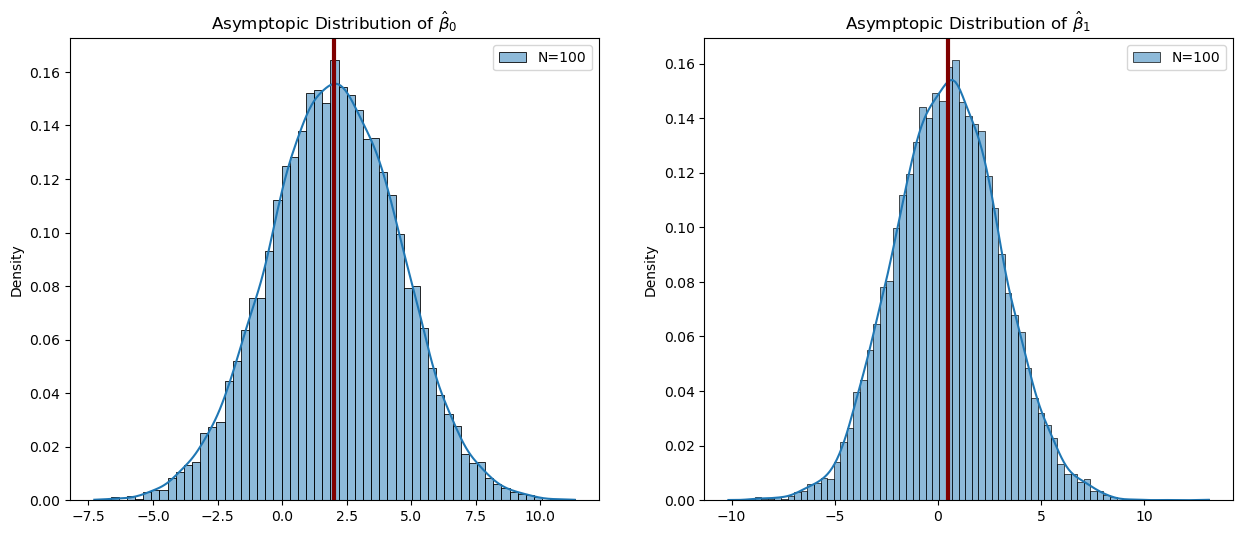

In [14]:
# Following steps in slide 12:
# Step 1: set the number T of repetitions of the simulation
T = 10000

# Step 2: create an empty list (or array) to store results of the simulation.
beta0_hat = np.zeros(T)
beta1_hat = np.zeros(T)

# Step 3: create a loop where for each repetition t = {1, ..., T } of the experiment:
# 1. Generate a new sample
# 2. Run an OLS regression on the sample.
# 3. Store the OLS coefficients in the list.

for t in range(T):
    # Generate a new sample (copy from 1a)
    x1 = np.random.normal(0, 1, N)
    e = np.random.normal(0, 25, N)
    y1 = 2 + 0.5*x1 + e 
    
    # add constant to x
    x = sm.add_constant(x1)
    
    # Run an OLS regression on the sample.
    OLS = sm.OLS(y1, x).fit()
    
    # Store the OLS coefficients in the list.
    beta0_hat[t] = OLS.params[0]
    beta1_hat[t] = OLS.params[1]


fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(beta0_hat, ax=ax[0], label="N=100", kde=True, stat="density")
ax[0].axvline(np.mean(beta0_hat), color = 'maroon', linewidth = 3)
ax[0].set_ylabel('Density')
ax[0].legend()
ax[0].set_title(r"Asymptopic Distribution of $\hat{\beta}_{0}$")

sns.histplot(beta1_hat, ax=ax[1], label="N=100", kde=True, stat="density")
ax[1].axvline(np.mean(beta1_hat), color = 'maroon', linewidth = 3)
ax[1].set_ylabel('Density')
ax[1].legend()
ax[1].set_title(r"Asymptopic Distribution of $\hat{\beta}_{1}$")

plt.show()

### Exercise 1c:
Redo exercise a with a sample size N = 1000. How do the βˆOLS asymptotic distributions change when the sample size increases?

In [15]:
N_c = 1000
x1 = np.random.normal(0, 1, N_c)
e = np.random.normal(0, 25, N_c)
y1 = 2 + 0.5*x1 + e

# add constant to x
x = sm.add_constant(x1)

# estimate OLS model
OLS = sm.OLS(y1, x)
output = OLS.fit()
print(output.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4492
Date:                Tue, 13 Feb 2024   Prob (F-statistic):              0.503
Time:                        08:28:19   Log-Likelihood:                -4610.4
No. Observations:                1000   AIC:                             9225.
Df Residuals:                     998   BIC:                             9235.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1777      0.771      4.120      0.0

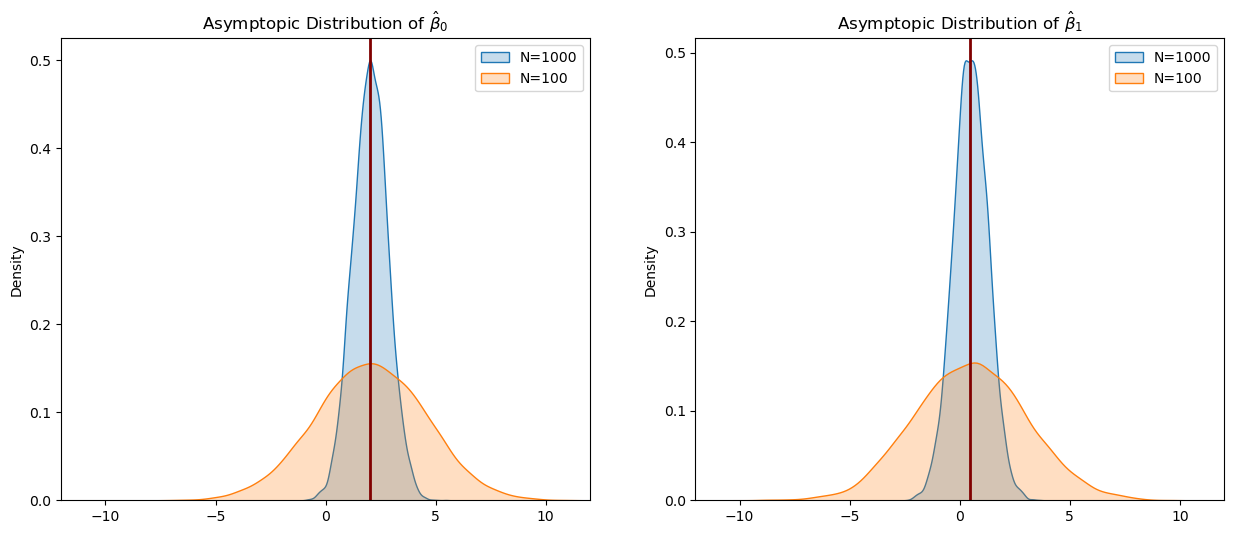

In [16]:
beta0_hat_c = np.zeros(T)
beta1_hat_c = np.zeros(T)

for t in range(T):
    # Generate a new sample (copy from 1a)
    x1 = np.random.normal(0, 1, N_c)
    e = np.random.normal(0, 25, N_c)
    y1 = 2 + 0.5*x1 + e 
    
    # add constant to x
    x = sm.add_constant(x1)
    
    # Run an OLS regression on the sample.
    OLS = sm.OLS(y1, x).fit()
    
    # Store the OLS coefficients in the list.
    beta0_hat_c[t] = OLS.params[0]
    beta1_hat_c[t] = OLS.params[1]


fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.kdeplot(beta0_hat_c, ax=ax[0], label="N=1000", fill=True)
sns.kdeplot(beta0_hat, ax=ax[0], label="N=100", fill=True)
ax[0].axvline(np.mean(beta0_hat), color = 'maroon', linewidth = 2)
ax[0].set_ylabel('Density')
ax[0].set_xlim(-12,12)
ax[0].legend()
ax[0].set_title(r"Asymptopic Distribution of $\hat{\beta}_{0}$")

sns.kdeplot(beta1_hat_c, ax=ax[1], label="N=1000", fill=True)
sns.kdeplot(beta1_hat, ax=ax[1], label="N=100", fill=True)
ax[1].axvline(np.mean(beta1_hat), color = 'maroon', linewidth = 2)
ax[1].set_ylabel('Density')
ax[1].set_xlim(-12,12)
ax[1].legend()
ax[1].set_title(r"Asymptopic Distribution of $\hat{\beta}_{1}$")

plt.show()

From both the OLS output and the graphs, we can see that as N increases (from 100 to 1000), the output converges towards the mean. This is what we would expect to see.

## Exercise 2
### Exercise 2a:
Simulate and plot the AR(1) process given by equation (1) for T=50 periods.

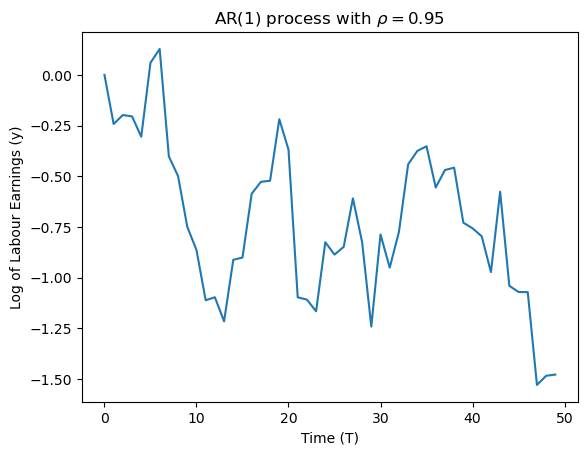

In [17]:
# Set seed
np.random.seed(12354)
# Define AR(1) function
def ar1_sim(T,rho,y0=0,a=0,sigma_e=0.25): 
    y = np.empty(T)
    y[0] = y0
    for i in range(1,T):
        e = np.random.normal(0,sigma_e,1)
        y[i] = rho*y[i-1] + e 
    return y
# Set parameters
T = 50
rho = 0.95
# Simulate AR(1) for 50 periods
y_a = ar1_sim(50, 0.95)
# Plot AR(1)
fig, ax = plt.subplots()
ax.plot(range(0,T), y_a)
ax.set_xlabel('Time (T)') 
ax.set_ylabel('Log of Labour Earnings (y)') 
ax.set_title(fr'AR(1) process with $\rho={rho}$') 
plt.show()

### Exercise 2b:
Create a function that simulates N AR(1) processes for T periods.

In [18]:
def ar1_rep(N,T,rho,y0=0,a=0,sigma_e=0.25): 
    data = []
    for j in range(0,N): 
        y = np.empty(T)
        y[0] = y0
        for i in range(1,T):
            e = np.random.normal(0,sigma_e,1)
            y[i] = rho*y[i-1] + e
        data.append(y)
    return np.array(data)

### Exercise 2c:
Simulate and plot 5 AR(1) processes given by equation (1) for t=50 periods. What are the stationary values of $E(y_t)$ and $Var(y_t)$? What is the sample mean of $y_t$ and its sample variance?

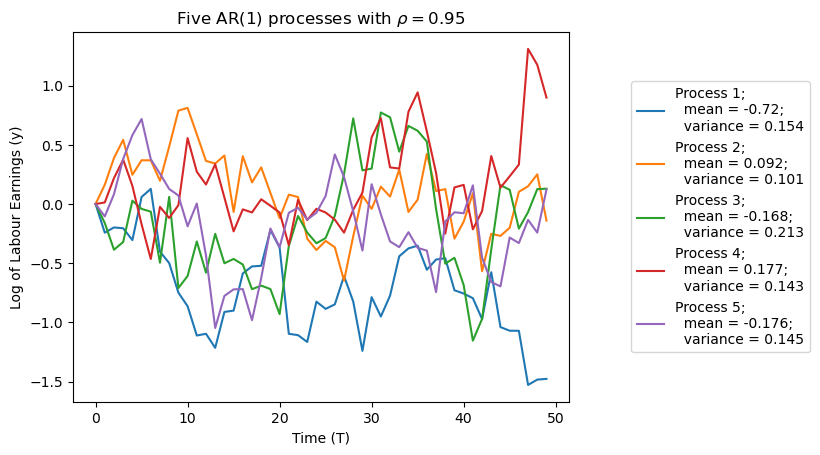

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [19]:
np.random.seed(12354)

# Set parameters
N = 5
T = 50
rho = 0.95

# Simulate 5 AR(1)s for 50 periods
n_5 = ar1_rep(N, T, rho)  # Ensure this function is correctly defined or imported

# Calculate sample means and variances for each AR(1) process (this is for the legend in the graph
sample_means = np.mean(n_5, axis=1)
sample_variances = np.var(n_5, axis=1)

# Plot 5 AR(1)s for 50 periods
fig, ax = plt.subplots()
for i in range(N):
    label = f'Process {i+1};\n  mean = {sample_means[i].round(3)};\n  variance = {sample_variances[i].round(3)}'
    ax.plot(n_5[i, :].transpose(), label=label)

# Add labels for x-axis, y-axis, and title
ax.set_xlabel('Time (T)')
ax.set_ylabel('Log of Labour Earnings (y)')
ax.set_title(r'Five AR(1) processes with $\rho=0.95$')

# Adding a legend to differentiate the AR(1) processes -- bbox getting it off of the plot
ax.legend(loc='right', bbox_to_anchor=(1.5, 0.5))

# Calculating the stationary values
stationary_mean = np.mean(n_5[:, -1])
stationary_variance = np.var(n_5[:, -1])

plt.show()

# Displaying the calculated stationary values, means, and variances
display(Latex(f"Stationary value of $E(y_t)$: {stationary_mean.round(4)}"))
display(Latex(f"Stationary value of $Var(y_t)$: {stationary_variance.round(4)}"))

### Exercise 2d:
The stationary earnings distribution. Simulate for a large T (like T=1000) the AR(1) process of 10000 individuals. Use the result of the last period to plot the stationary distribution. Comment whether the stationary distributions of log-earnings yt and earnings eyt resemble to distributions seen in in previous problem sets or lectures.

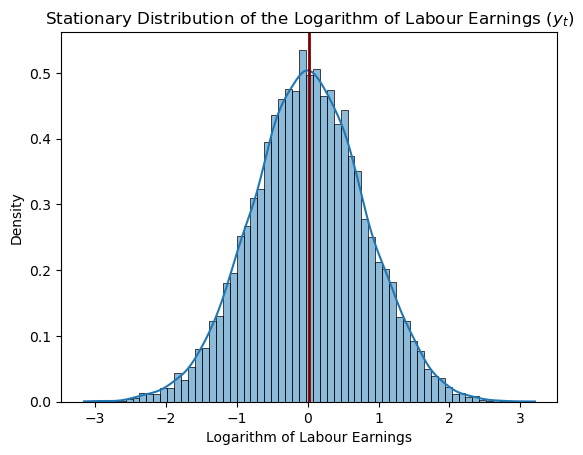

In [20]:
np.random.seed(12354)
# Set parameters
N = 10000
T = 1000
rho = 0.95
# Simulate 10,000 AR(1)s for 1000 periods
n_10000 = ar1_rep(N,T,rho)
# Select the last time period (column)
stationary_earnings = n_10000[:,T-1]

# Plot Stationary earnings distribution
fig, ax = plt.subplots()
sns.histplot(stationary_earnings, label="Long-run earnings", kde=True, stat="density")
ax.axvline(x=stationary_earnings.mean(), color='maroon', linewidth=2) 
ax.set_xlabel('Logarithm of Labour Earnings')
ax.set_ylabel('Density')
ax.set_title(r'Stationary Distribution of the Logarithm of Labour Earnings ($y_{t}$)') 
plt.show()

From the lectures you would expect the stationary distribution of log-earnings to resemble a normal distribution because of the properties of AR(1) processes. In addition, you would also expect earnings to follow a log-normal distribution.

### Exercise 2e:
From the stationary distribution you previously computed, compute the mean and variance of the log of earnings ($y_t$) and compute the Gini coefficient of earnings ($e^{y_t}$ ). Do the sample analogs approximate well the true values of mean and variange of the log of earnings? Does this income process generate a high or low income inequality?

In [21]:
#Define function for gini coefficient
def gini(x): 
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total = total + np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))
    
# Calculate the mean of log earnings, variance of log earnings and the Gini coefficient of earnings
mean_log_earnings = np.mean(stationary_earnings)
print('The mean of log earnings is: ', round(mean_log_earnings, 4))

var_log_earnings = np.var(stationary_earnings)
print('The variance of log earnings is: ',round(var_log_earnings,4))

e_earnings = np.exp(stationary_earnings)
gini_earnings = gini(e_earnings)
print('The gini_coefficient of earnings is: ',round(gini_earnings,4))

The mean of log earnings is:  0.0116
The variance of log earnings is:  0.6328
The gini_coefficient of earnings is:  0.4253


The sample analogs for the mean and variance of log earnings provide a reasonable approximation to the theoretical expectations for an AR(1) process. The positive mean implies that there is a slight upward trend in earnings over time whilst the variance suggests that there is a substantial spread in earnings. Meanwhile the Gini coefficient implies a moderate level of income inequality which is similar to countries such as Madagascar and Uganda.

### Exercise 2f:
For computational reasons, Aiyagari discretizes the AR(1) process into a Markov process of 7 states. Using the Rouwenhorst method, discretize the AR(1) process of this exercise into a 3 states Markov process. What is the resulting transition matrix P? What is the resulting stationary distribution $\psi^*$?

In [22]:
warnings.filterwarnings('ignore')

# Parameters for the AR(1) process
n=3 #Number of states
rho = 0.95 # Autoregressive coefficient
sigma = 0.25 # Standard deviation of innovations 
mu = 0 # Mean of the AR(1) process

# Discretising the AR(1) process
mc = qe.rouwenhorst(n, rho, sigma) # Access the transition matrix
P = mc.P

# Set print options for NumPy
np.set_printoptions(precision=3, suppress=True)

# Calculate the stationary distribution using the MarkovChain object's method
psi_star = mc.stationary_distributions.flatten()
print("Transition Matrix P:\n", P)
display(Latex(fr"Stationary Distribution $\psi$ *: {psi_star}"))

Transition Matrix P:
 [[0.951 0.049 0.001]
 [0.024 0.951 0.024]
 [0.001 0.049 0.951]]


<IPython.core.display.Latex object>

## Exercise 3
### Exercise 3a:
Simulate a binomial distribution with n = 4 and p = 0.5. Plot the resulting distribution.

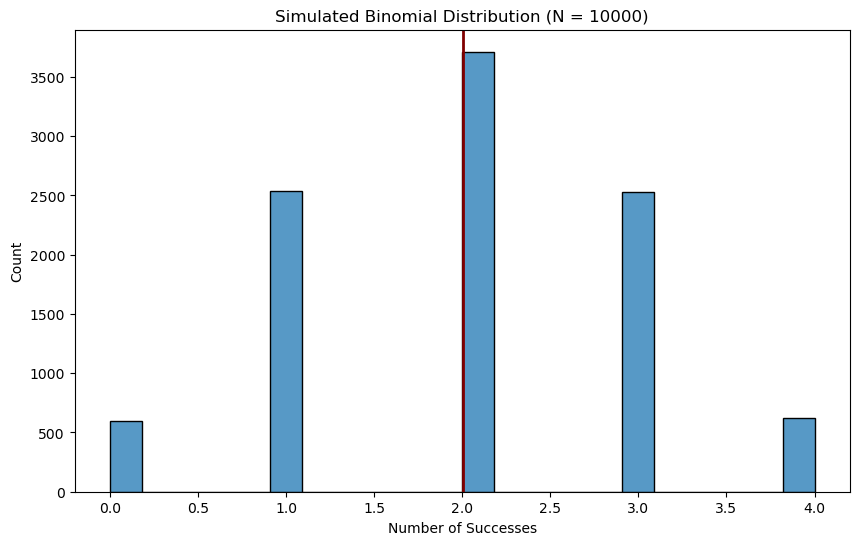

In [23]:
# Parameters for the binomial distribution
n = 4  # number of trials
p = 0.5  # probability of success on each trial

# Generate binomial distribution
y = np.random.binomial(n, p, 10000)  # simulate 10,000 trials

#Set the figsize
plt.figure(figsize=(10, 6)) 
# Plot the distribution
ax = sns.histplot(y, label = 'Binomial Distribution')
ax.set_title('Simulated Binomial Distribution (N = 10000)')
ax.axvline(x=y.mean(), color='maroon', linewidth=2) 
ax.set_xlabel('Number of Successes')
ax.set_ylabel('Count')
plt.show()

### Exercise 3b:
Compute the expected value of a function $g(x) = x^2$ where $x$ follows a Poisson distribution with $\lambda = 2$. Use Monte Carlo integration.

Is your result equal to $g(E(x))$? where $E(x) = \lambda = 2$ if $x ∼ Poisson(\lambda)$? Why?

In [24]:
#Define our function
def g(x):
    return x**(2)
#Define sample size and lambda value
N = 10000
λ = 2
#Define distribution
X = np.random.poisson(λ,N)

#Evaluate X using function using g(x)
g_X = g(X)

#Compute the sample average of g(X) 
monte_carlo_int = np.mean(g_X)

# Print results
display(Latex(f'$E[g(x)] =$ {monte_carlo_int}'))
display(Latex(f'Expected value: {g(2)}'))
#Print Boolean for whether our two functions are equal
display(Latex(f"Is $g(E[x]) == E[g(x)]: g(\lambda) == $ {monte_carlo_int}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

This difference in values occurs due to the fact that $g(x) = x^2$ is not a linear function, and the expected value of a squared random variable includes a term to represent the variance, which in this case is $\lambda$. Therefore $E[g(x)]$ = $\lambda + \lambda^2 = 6$ rather than $g(E[x]) = \lambda^2 = 4$.

## Exercise 4
### Exercise 4a:
Simulate y for N = 100000 and compute the average, the variance, and the Gini of $y$.

In [25]:
#Define our variable names
mu = 7.5
sigma = 0.8
N = 10000
#Define the log-normal distribution
y = np.random.lognormal(mu, sigma, N)

#Average of y
y_mean = np.mean(y)

#Variance of y
y_var = np.var(y)

#Define function for gini coefficient
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total = total + np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

#Gini coefficient of y
y_gini = gini(y)

print(f"The average of y is: {round(y_mean, 2)}")
print(f"The variance of y is: {round(y_var, 2)}")
print(f"The Gini coefficient is: {round(y_gini, 4)}")

The average of y is: 2496.35
The variance of y is: 5815863.57
The Gini coefficient is: 0.4286


## Exercise 4b:
Now consider that individuals follow a consumption rule that takes the following functional form:

$c_i =(y_i)^{0.8}+0.5y_i+500$

Compute the average, the variance, and the Gini coefficient of $c$.

In [26]:
#Define function which calculates c for each y
def consumption(y):
    return y**0.8 + 0.5*y + 500

#Generate values
c = consumption(y)

#Calculate our values
c_mean = np.mean(consumption(y))
c_var = np.var(consumption(y))
c_gini = gini(consumption(y))
#Average
print('The mean of consumption is:',round(c_mean, 2))
#Variance
print('The variance of consummption is:',round(c_var, 2))
#Gini Coefficient
print('The Gini coefficient of consummption is:', round(c_gini, 2))

The mean of consumption is: 2244.13
The variance of consummption is: 2432848.72
The Gini coefficient of consummption is: 0.32


### Exercise 4c:
Plot the distribution of $y$ and $c$ in the same graph.

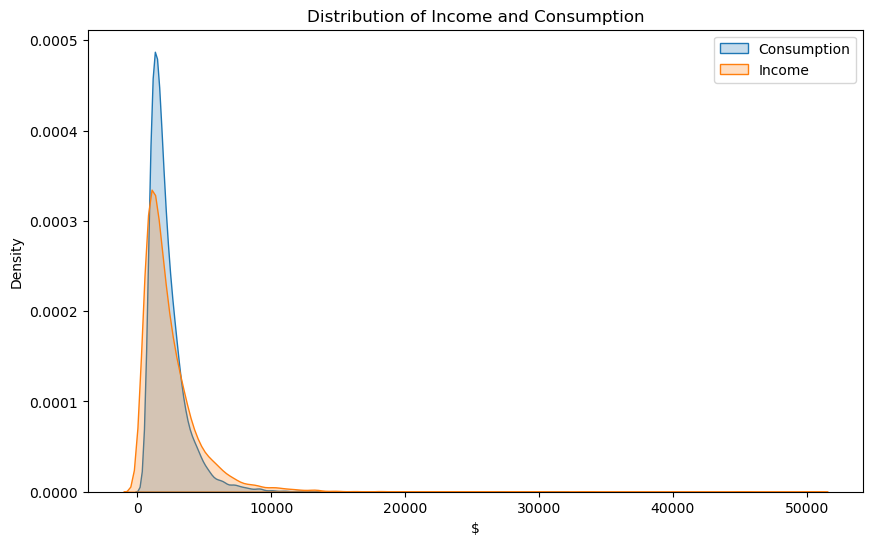

In [27]:
fig, ax = plt.subplots(figsize = (10, 6))

#Define plot
sns.kdeplot(c, label="Consumption", fill=True)
sns.kdeplot(y, label="Income", fill=True)

#Set labels, legend and title
ax.set_xlabel("$")
ax.set_ylabel("Density")
ax.set_title("Distribution of Income and Consumption")
ax.legend()

plt.show()